In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('Housing.csv')

In [57]:
# Data Overview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [59]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [61]:
# check for missing values

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

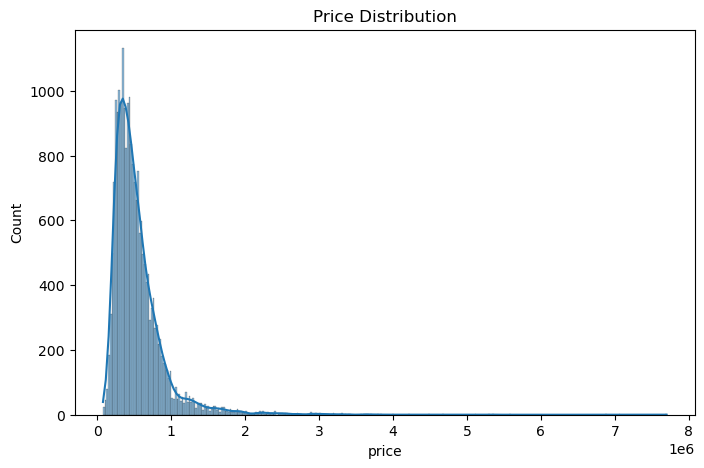

In [63]:
# Univariate analysis: price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution');

In [65]:
df = df.drop(columns=['date','id'],axis=1)

In [67]:
# Features to check for outliers
numeric_features = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows outside the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to the numeric features
df_cleaned = remove_outliers_iqr(df, numeric_features)

print(f"Shape before outlier removal: {df.shape}")
print(f"Shape after outlier removal: {df_cleaned.shape}")

Shape before outlier removal: (21613, 19)
Shape after outlier removal: (16654, 19)


In [71]:
df = df_cleaned.copy()

In [73]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

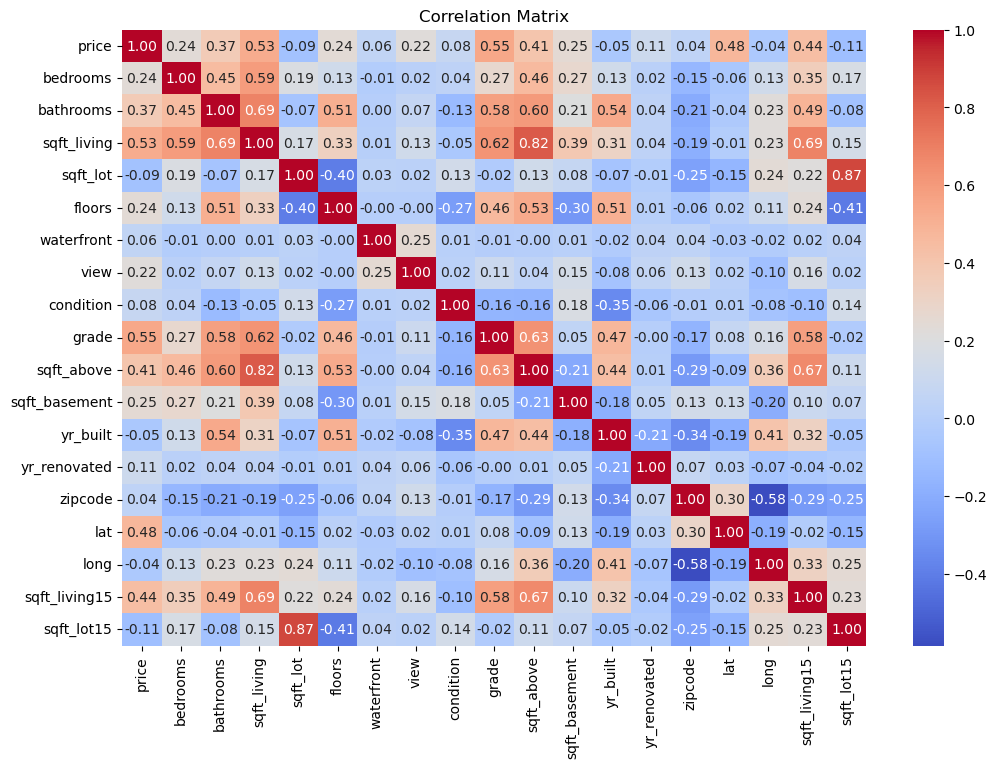

In [75]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Price vs. Sqft Living')

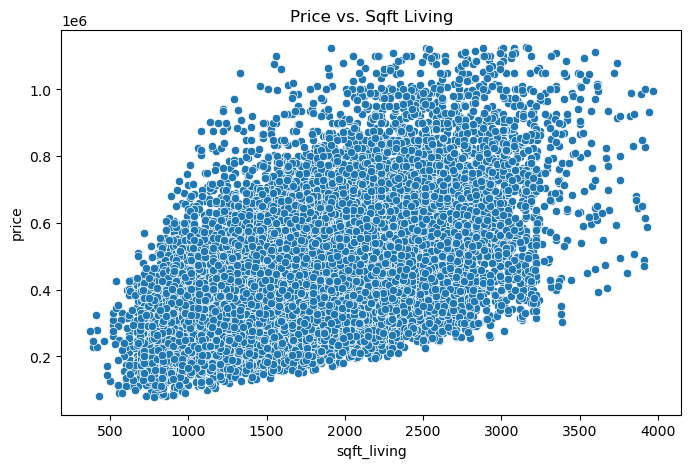

In [77]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Sqft Living')

<Axes: ylabel='price'>

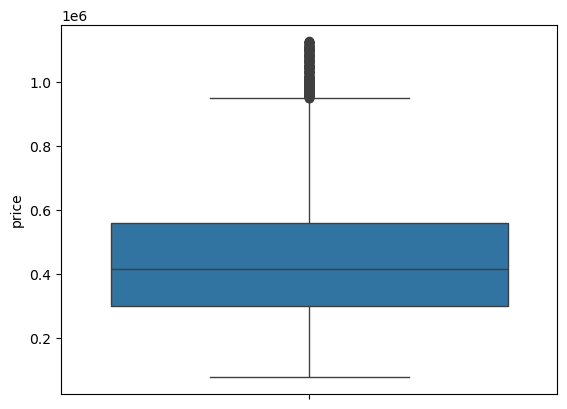

In [79]:
sns.boxplot(df['price'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16654 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16654 non-null  float64
 1   bedrooms       16654 non-null  int64  
 2   bathrooms      16654 non-null  float64
 3   sqft_living    16654 non-null  int64  
 4   sqft_lot       16654 non-null  int64  
 5   floors         16654 non-null  float64
 6   waterfront     16654 non-null  int64  
 7   view           16654 non-null  int64  
 8   condition      16654 non-null  int64  
 9   grade          16654 non-null  int64  
 10  sqft_above     16654 non-null  int64  
 11  sqft_basement  16654 non-null  int64  
 12  yr_built       16654 non-null  int64  
 13  yr_renovated   16654 non-null  int64  
 14  zipcode        16654 non-null  int64  
 15  lat            16654 non-null  float64
 16  long           16654 non-null  float64
 17  sqft_living15  16654 non-null  int64  
 18  sqft_lot15 

In [ ]:
# Feature Engineering

In [83]:
df['house_age'] = 2023 - df['yr_built']
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Log transformation for skewed features
df['price'] = np.log1p(df['price'])
df['sqft_lot'] = np.log1p(df['sqft_lot'])

In [85]:
df = df.drop(['yr_built', 'yr_renovated'], axis=1)

In [ ]:
# Model trianing

In [87]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
scaled_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
# Split data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

train_metrics = evaluate_model(y_train, y_train_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

print(f"Train Metrics: MAE: {train_metrics[0]:.2f}, MSE: {train_metrics[1]:.2f}, RMSE: {train_metrics[2]:.2f}, R²: {train_metrics[3]:.2f}")
print(f"Test Metrics: MAE: {test_metrics[0]:.2f}, MSE: {test_metrics[1]:.2f}, RMSE: {test_metrics[2]:.2f}, R²: {test_metrics[3]:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


Train Metrics: MAE: 0.08, MSE: 0.01, RMSE: 0.11, R²: 0.94
Test Metrics: MAE: 0.08, MSE: 0.01, RMSE: 0.11, R²: 0.94
           Feature  Coefficient
12             lat     0.473173
2      sqft_living     0.154045
13            long     0.126801
9       sqft_above     0.110798
10   sqft_basement     0.084081
8            grade     0.052476
1        bathrooms     0.029283
7        condition     0.026151
4           floors     0.018161
6             view     0.014820
0         bedrooms     0.013439
3         sqft_lot     0.007592
17  price_per_sqft     0.002975
16       house_age     0.000327
11         zipcode    -0.000047
5       waterfront    -0.000159
14   sqft_living15    -0.000740
15      sqft_lot15    -0.010469


In [93]:
from joblib import dump

# Save the model to a file
dump(model, 'new_linear_regression_model.joblib')
print("Model saved as 'new_linear_regression_model.joblib'")


Model saved as 'new_linear_regression_model.joblib'


In [95]:
from joblib import load

# Load the model from the file
loaded_model = load('new_linear_regression_model.joblib')
print("Model loaded successfully")

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)


Model loaded successfully
